In [82]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv('GlobalLandTemperaturesByCity.csv')
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [86]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [87]:
df['AverageTemperature']=df['AverageTemperature'].fillna(df['AverageTemperature'].mean())
df['AverageTemperatureUncertainty']=df['AverageTemperatureUncertainty'].fillna(df['AverageTemperatureUncertainty'].mean())

In [85]:
df['dt']=pd.to_datetime(df['dt'],errors='coerce')
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

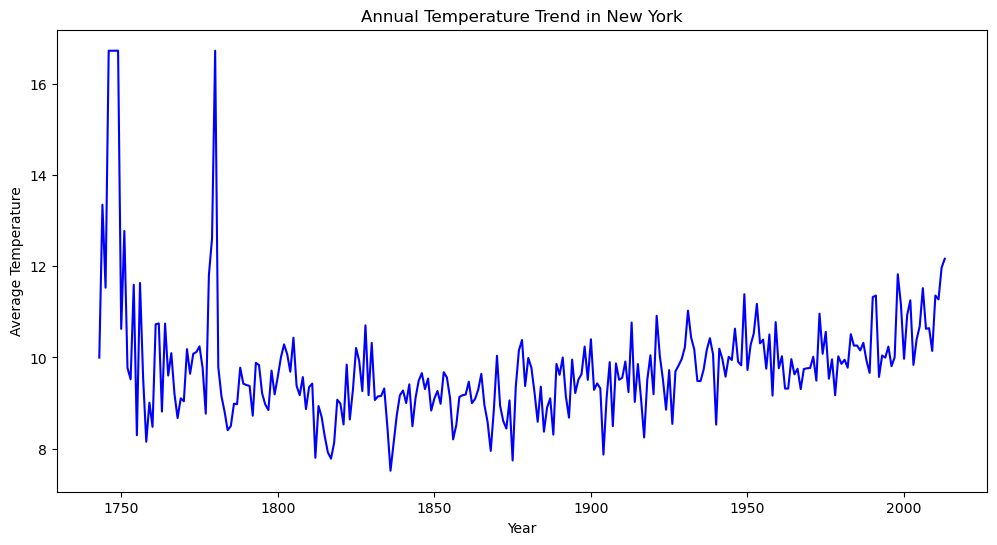

In [88]:
# how the average temperature change in a city over a year
# Line PLot
city_data=df[df['City']=='New York'].copy()
city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()

# Line PLot
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],linestyle='-',color='blue')
plt.title('Annual Temperature Trend in New York')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()



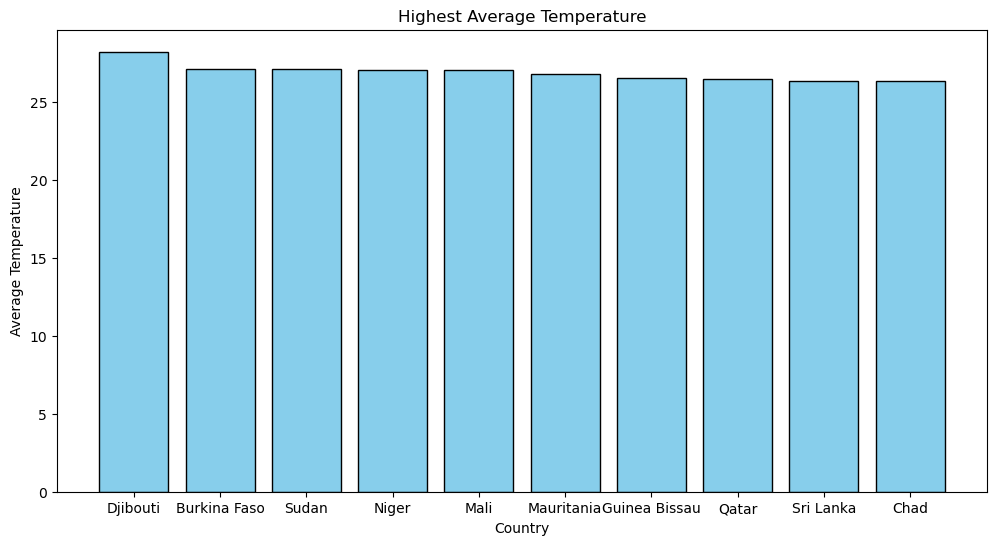

In [35]:
# Bar PLot
# Which Countries had the highest average temperatures in the dataset?
country_avg_temp=df.groupby('Country')['AverageTemperature'].mean().reset_index().sort_values(by='AverageTemperature',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(country_avg_temp['Country'],country_avg_temp['AverageTemperature'],linestyle='-',color='skyblue',edgecolor='black',linewidth=1)
plt.title('Highest Average Temperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.show()

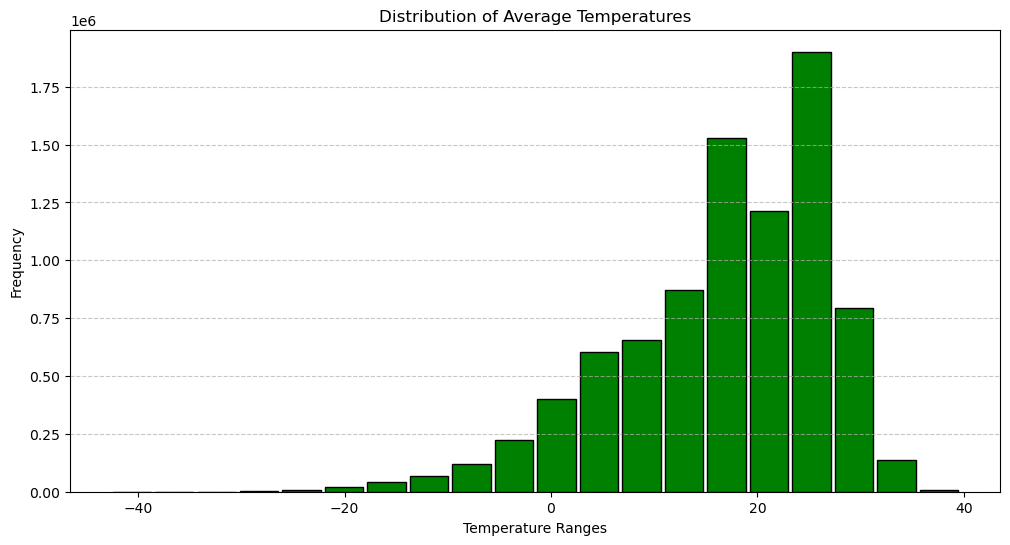

In [89]:
# Histrogram
# what is the distribution of average temperature across all data?
plt.figure(figsize=(12,6))
plt.hist(df['AverageTemperature'].dropna(),bins=20,rwidth=0.9,color='green',edgecolor='black')
plt.xlabel('Temperature Ranges')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperatures')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

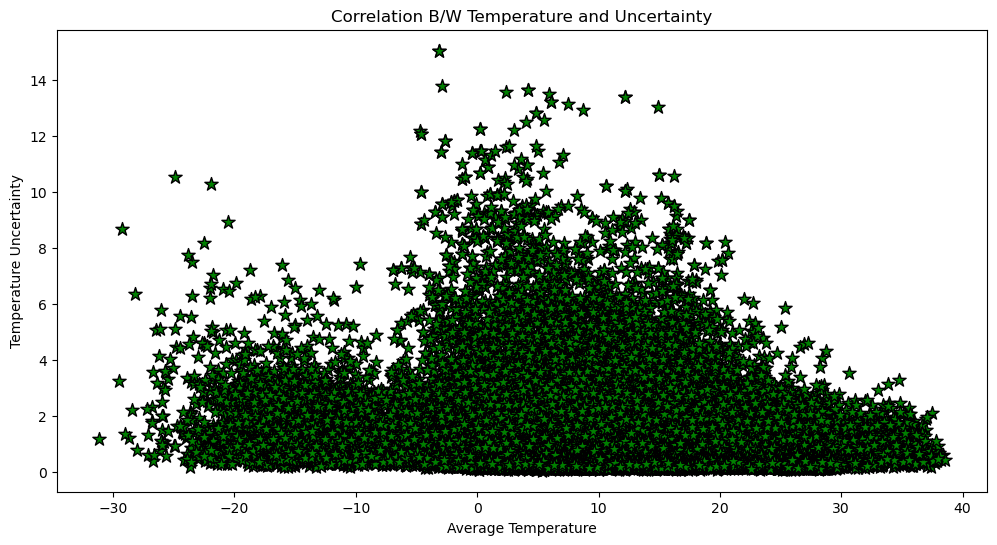

In [90]:
# Scatter PLot
# Is there a correlation b/w temperature and uncertainty in the dataset?
plt.figure(figsize=(12,6))
plt.rcdefaults()
plt.scatter(df['AverageTemperature'].head(50000),df['AverageTemperatureUncertainty'].head(50000),s=100,color='green',edgecolor='black',marker="*")
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainty')
plt.title('Correlation B/W Temperature and Uncertainty')
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_16096\2368551180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread['Years'] = spread['dt'].dt.year


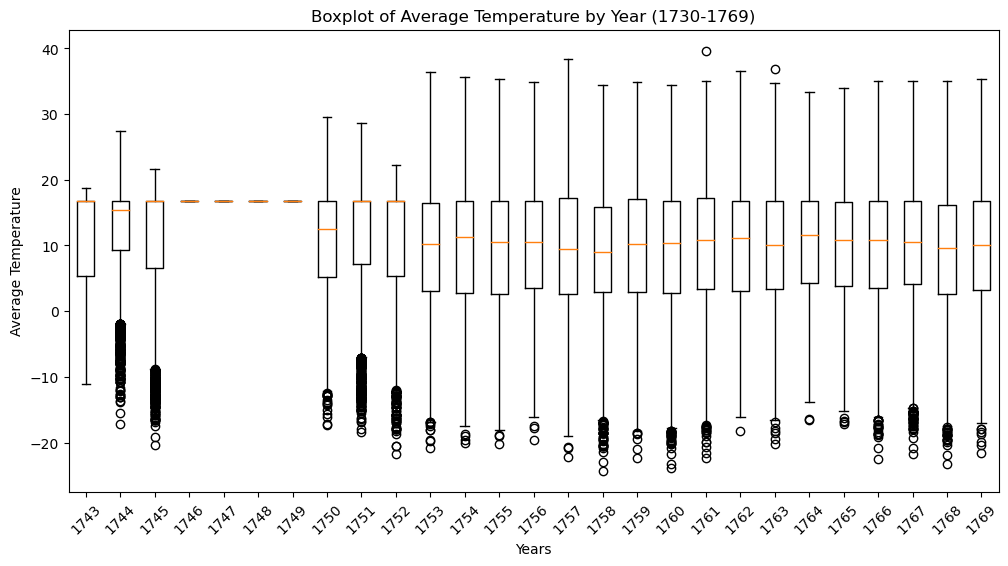

In [91]:
spread = df[(df['dt'] > '1730-01-01') & (df['dt'] < '1769-12-31')]

spread['Years'] = spread['dt'].dt.year

plt.figure(figsize=(12, 6))
plt.boxplot([spread['AverageTemperature'][spread['Years'] == year] for year in spread['Years'].unique()], 
            labels=spread['Years'].unique())

plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.title("Boxplot of Average Temperature by Year (1730-1769)")
plt.xticks(rotation=45) 
plt.show()

In [81]:

# country_data=df[df['City']=='India'].copy()
# country_data=country_data.dropna(subset=['dt'])
# country_data['Year']=country_data['dt'].dt.year
# country_data=country_data
# grouped_data=[gropu['AverageTemperature'] for _, group in country_data.groupby('Year')]


In [94]:
# pip install seaborn
# KDE=>kernal density information visualize the probability density of a variable

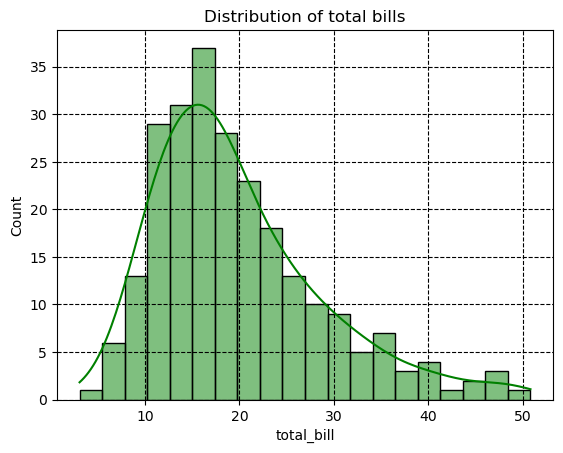

In [121]:
import seaborn as sns
# Histplot(histrogram)
sns.histplot(data=tips, x="total_bill",kde=True,bins=20,color="green")
plt.title("Distribution of total bills")
plt.grid(linestyle="--",color="black")
plt.show()

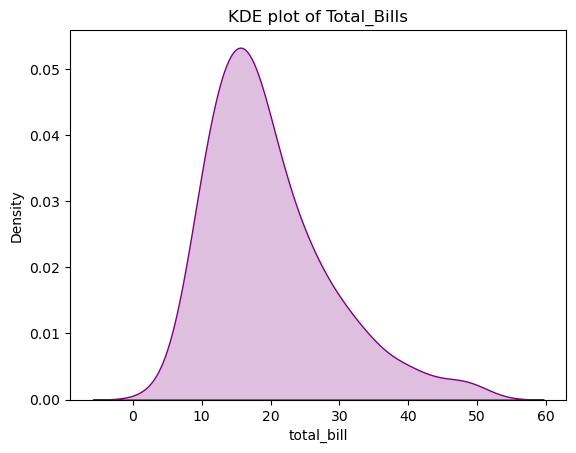

In [123]:
# KDE=>kernal density information visualize the probability density of a variable
# KDE PLOT
sns.kdeplot(data=tips,x="total_bill",color='purple',fill=True)
plt.title('KDE plot of Total_Bills')
plt.show()

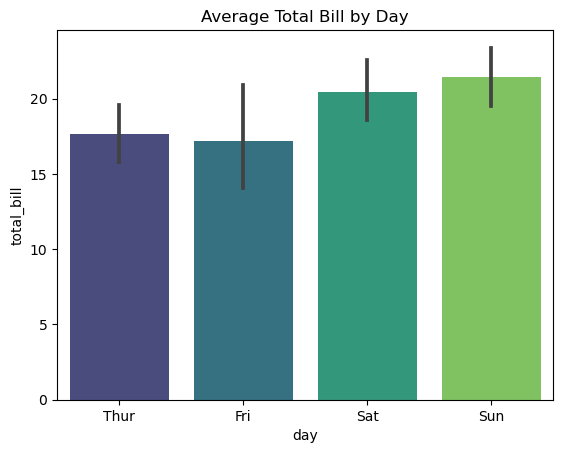

In [125]:
# Categorial Plots
# a)bar plot
sns.barplot(data=tips,x='day',y="total_bill",palette="viridis")
plt.title("Average Total Bill by Day")
plt.show()

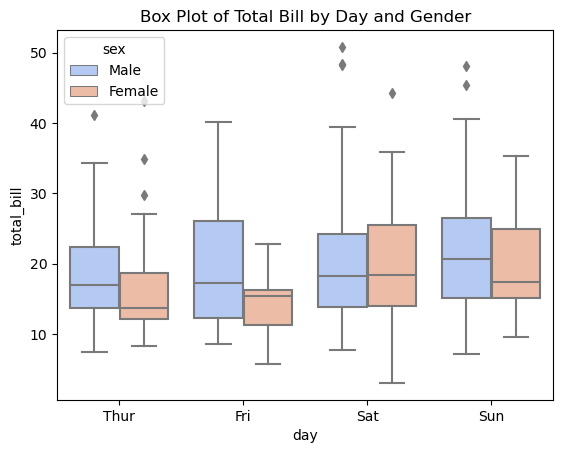

In [126]:
# b)Box Plot
sns.boxplot(data=tips,x='day',y="total_bill",palette="coolwarm",hue='sex')
plt.title('Box Plot of Total Bill by Day and Gender')
plt.show()


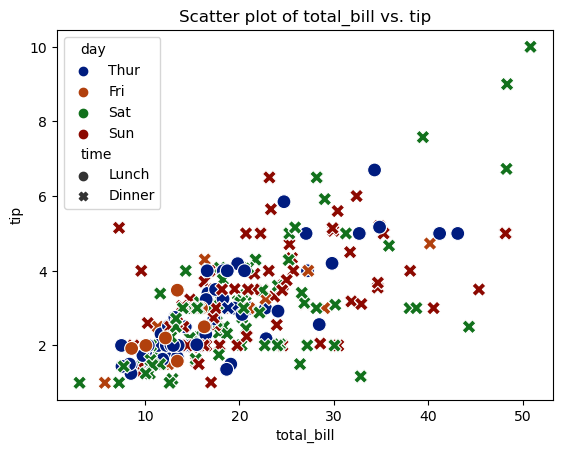

In [140]:
# c)scatter plot
sns.scatterplot(data=tips,x='total_bill',y='tip',style='time',hue='day',palette='dark',s=100)
plt.title('Scatter plot of total_bill vs. tip')
plt.show()

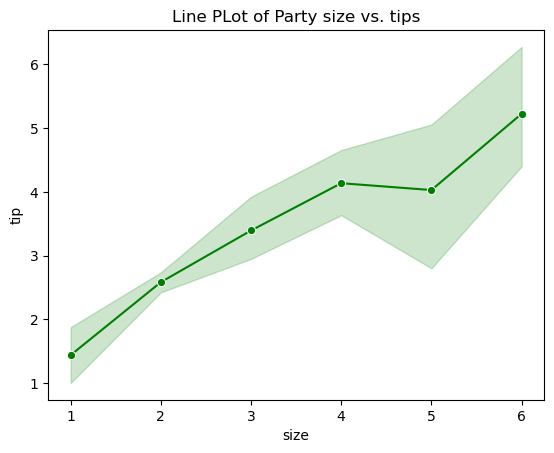

In [141]:
# Line plOt
sns.lineplot(data=tips,x='size',y='tip',marker='o',color='green')
plt.title('Line PLot of Party size vs. tips')
plt.show()

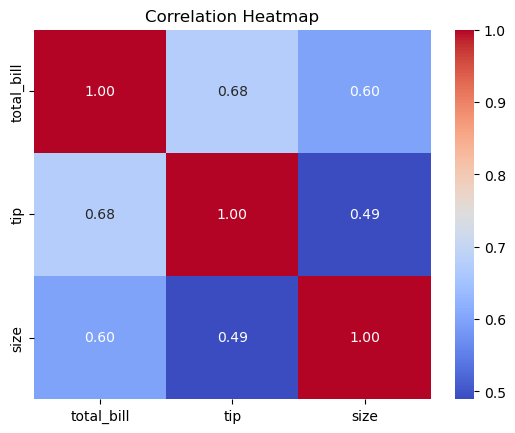

In [144]:
# heatmap
numeric_tips = tips.select_dtypes(include=['number'])

corr_matrix = numeric_tips.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


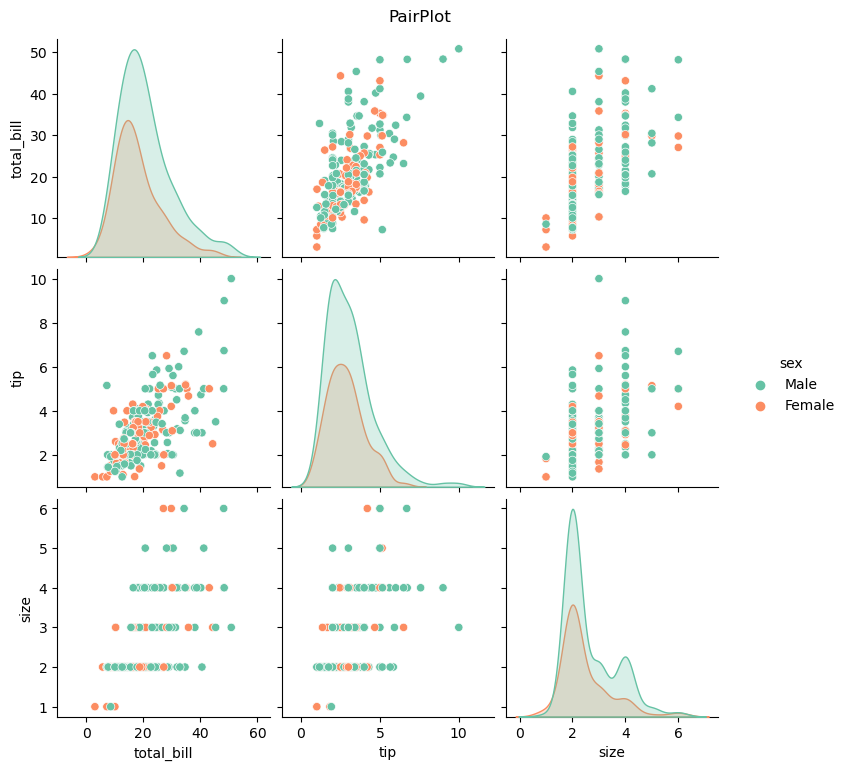

In [147]:

# pairplot
sns.pairplot(data=tips, hue='sex', palette='Set2')
plt.suptitle('PairPlot', y=1.02)
plt.show()